
# **Data preprocessing**


##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

## Importing dataset

PCOS data without infertility

In [ ]:
dataset_woi=pd.read_csv("PCOS_data_without_infertility.csv")

PCOS data with infertility

In [ ]:
# dataset_wi=pd.read_csv("PCOS_infertility.csv")

In [ ]:
#Merge the files
#dataset_woi= pd.merge(dataset_woi,dataset_wi, on='Patient File No.', suffixes={'','_wo'},how='left')
#Drop repeated features
#dataset_woi =dataset_woi.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo',
#      'II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

## Taking care of missing data

In [ ]:
dataset_woi.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

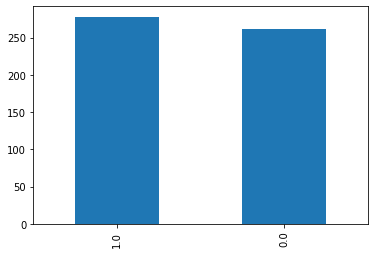

In [ ]:
dataset_woi['Fast food (Y/N)'].value_counts().plot.bar()

In [ ]:
dataset_woi['Fast food (Y/N)'].mode()

0    1.0
dtype: float64

In [ ]:
dataset_woi['Fast food (Y/N)'].fillna(1.0,inplace=True)
dataset_woi.isnull().sum()

dataset_woi=dataset_woi.fillna(value=dataset_woi['Marraige Status (Yrs)'].mean())
dataset_woi.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
dataset_woi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

## Encoding categorical data

In [ ]:
le=LabelEncoder()
label1=le.fit_transform(dataset_woi['II    beta-HCG(mIU/mL)'])
dataset_woi.drop('II    beta-HCG(mIU/mL)',axis=1,inplace=True)
dataset_woi['II    beta-HCG(mIU/mL)']=label1
label2=le.fit_transform(dataset_woi['AMH(ng/mL)'])
dataset_woi.drop('AMH(ng/mL)',axis=1,inplace=True)
dataset_woi['AMH(ng/mL)']=label2

KeyError: ignored

In [ ]:
#correlation matrix
corr=dataset_woi.corr()
corr["PCOS (Y/N)"].sort_values()

Cycle length(days)       -0.178480
 Age (yrs)               -0.168513
Marraige Status (Yrs)    -0.112681
No. of aborptions        -0.057158
PRG(ng/mL)               -0.043834
FSH(mIU/mL)              -0.030319
  I   beta-HCG(mIU/mL)   -0.027617
Pregnant(Y/N)            -0.027565
FSH/LH                   -0.018336
TSH (mIU/L)              -0.010140
PRL(ng/mL)                0.005143
BP _Systolic (mmHg)       0.007942
Waist:Hip Ratio           0.012386
II    beta-HCG(mIU/mL)    0.017531
Blood Group               0.036433
RR (breaths/min)          0.036928
BP _Diastolic (mmHg)      0.038032
RBS(mg/dl)                0.048922
Patient File No.          0.060998
Sl. No                    0.060998
LH(mIU/mL)                0.063879
Reg.Exercise(Y/N)         0.065337
AMH(ng/mL)                0.065741
Height(Cm)                0.068254
Vit D3 (ng/mL)            0.085494
Hb(g/dl)                  0.087170
Pulse rate(bpm)           0.091821
Avg. F size (R) (mm)      0.097690
Endometrium (mm)    

In [ ]:
corr = dataset_woi.corr() 
corr.style.background_gradient(cmap='coolwarm')

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),II beta-HCG(mIU/mL),AMH(ng/mL)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,-0.088681,-0.022959,-0.121856,-0.019390,0.038878,-0.107131,-0.015285,0.016609,0.050818,0.014280,-0.328816,-0.048228,0.543779,-0.073970,0.077545,-0.036627,-0.056345,0.017168,0.013139,-0.052383,0.028256,0.018737,0.160834,0.152615,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219,-0.049523,0.001420
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,-0.088681,-0.022959,-0.121856,-0.019390,0.038878,-0.107131,-0.015285,0.016609,0.050818,0.014280,-0.328816,-0.048228,0.543779,-0.073970,0.077545,-0.036627,-0.056345,0.017168,0.013139,-0.052383,0.028256,0.018737,0.160834,0.152615,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219,-0.049523,0.001420
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199534,0.036433,0.091821,0.036928,0.087170,0.401644,-0.178480,-0.112681,-0.027565,-0.057158,-0.027617,-0.030319,0.063879,-0.018336,0.162297,0.164598,0.012386,-0.010140,0.005143,0.085494,-0.043834,0.048922,0.441047,0.464667,0.475733,0.172879,0.286077,0.376183,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648,0.017531,0.065741
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,-0.021558,-0.085943,0.055918,0.661641,-0.044165,0.220794,0.008148,-0.017794,0.000467,0.012464,-0.002784,0.035779,0.068413,0.016740,-0.048757,0.004388,-0.021909,0.097008,-0.028826,-0.073434,-0.103421,-0.082784,-0.032921,-0.039108,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238,0.015620,-0.088307
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901675,0.072682,0.019983,0.043614,0.009594,0.200758,-0.002308,0.043803,-0.051048,0.093540,0.015994,-0.025750,-0.029864,-0.004844,0.633983,0.639635,0.014285,0.068482,-0.049007,0.008164,0.069731,0.114277,0.419333,0.188240,0.180186,0.074381,0.063983,0.160774,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100,-0.015975,0.010783
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006878,0.040825,-0.074339,-0.029459,0.024378,-0.017336,0.009536,-0.066695,0.046365,-0.025648,0.062301,0.030941,-0.045498,0.022021,0.216173,0.209553,-0.010484,0.013504,-0.016096,-0.034934,0.049741,0.050399,0.018534,0.048910,0.074731,-0.013533,0.061129,0.032839,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035,0.022945,-0.081479
BMI,-0.083578,-0.083578,0.199534,0.021261,0.901675,-0.006878,1.000000,0.061939,0.050529,0.061905,0.003512,0.232828,-0.006232,0.083997,-0.073950,0.109861,-0.009960,-0.040715,-0.013310,-0.012077,0.596768,0.607501,0.023538,0.071379,-0.047575,0.027036,0.049462,0.093543,0.455356,0.181919,0.158704,0.084453,0.045656,0.157726,-0.080192,0.069491,0.139975,0.142886,0.104204,-0.011610,-0.111522,0.009349,-0.028719,0.054069
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061939,1.000000,0.047572,-0.023766,-0.001759,0.123724,-0.006290,-0.001794,-0.070906,-0.053956,-0.035303,0.028109,-0.019542,0.036279,-0.001468,0.004752,0.015817,0.017600,0.009837,0.044622,-0.031897,0.002159,0.009016,0.086287,0.023606,-0.039461,0.039029,-0.035836,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.0

In [ ]:
corr_features=dataset_woi.corrwith(dataset_woi["PCOS (Y/N)"]).abs().sort_values(ascending=False)
corr_features1=corr_features[corr_features>0.4].index
print(corr_features1)

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')


In [ ]:
dataset_woi=dataset_woi[corr_features1]

In [ ]:
x1=dataset_woi.drop(["PCOS (Y/N)"],axis=1).values
y1=dataset_woi["PCOS (Y/N)"].values

In [ ]:
print(x1)

[[ 3  3  0  0  0  2]
 [ 5  3  0  0  0  2]
 [15 13  0  0  0  2]
 ...
 [ 0  1  0  0  0  2]
 [ 6  7  0  0  0  4]
 [10  9  1  1  1  4]]


In [ ]:
print(y1)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 

## Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train_n=sc.fit_transform(x1_train)
x1_test_n=sc.fit_transform(x1_test)

In [ ]:
print(x1_train_n)

[[ 1.84777375  1.12308953 -0.64888568 -0.62426427 -0.78446454 -0.61508644]
 [ 0.74016437  0.43130054  1.5411035  -0.62426427  1.27475488 -0.61508644]
 [-0.36744502 -0.02989212 -0.64888568 -0.62426427 -0.78446454 -0.61508644]
 ...
 [-1.25353252 -1.18287377 -0.64888568 -0.62426427 -0.78446454  1.60981953]
 [-0.81048877 -0.95227744 -0.64888568 -0.62426427  1.27475488 -0.61508644]
 [-0.58896689 -0.95227744 -0.64888568  1.60188568 -0.78446454  1.60981953]]


In [ ]:
print(x1_test_n)

[[-0.14187798 -0.2853835  -0.7038557  -0.58915825 -0.76323278 -0.63653155]
 [ 1.03802563  0.97867928  1.42074576 -0.58915825 -0.76323278 -0.63653155]
 [-0.3778587  -0.79100861 -0.7038557  -0.58915825 -0.76323278  1.57101404]
 [-1.08580086 -1.04382116 -0.7038557   1.69733685  1.31021627 -0.63653155]
 [-1.08580086 -0.79100861  1.42074576 -0.58915825  1.31021627 -0.63653155]
 [-1.55776231 -1.29663372 -0.7038557  -0.58915825 -0.76323278 -0.63653155]
 [ 1.03802563  0.22024161 -0.7038557  -0.58915825  1.31021627 -0.63653155]
 [ 0.56606418  1.48430438 -0.7038557   1.69733685 -0.76323278 -0.63653155]
 [ 1.27400635  1.73711694  1.42074576 -0.58915825  1.31021627  1.57101404]
 [ 0.09410274 -0.03257094 -0.7038557  -0.58915825 -0.76323278 -0.63653155]
 [ 2.9258714   0.72586672 -0.7038557  -0.58915825 -0.76323278 -0.63653155]
 [-0.14187798 -0.53819605 -0.7038557  -0.58915825 -0.76323278 -0.63653155]
 [ 0.33008346 -0.2853835  -0.7038557  -0.58915825 -0.76323278 -0.63653155]
 [-0.3778587  -0.79100861

## Training models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x1_train_n,y1_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier.predict(x1_test_n)
y_pred=y_pred.reshape(len(y_pred),1)
print(np.concatenate((y1_test.reshape(len(y1_test),1),y_pred),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
#confusion matrix
cm=confusion_matrix(y1_test,y_pred)
print(cm)
acc=accuracy_score(y1_test,y_pred)
print(acc)

[[102   7]
 [ 10  44]]
0.8957055214723927


In [ ]:
#f1 score
f1_score(y1_test,y_pred)

0.838095238095238

In [ ]:
#recall score
recall_score(y1_test,y_pred)

0.8148148148148148

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x1_train_n, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.55 %
Standard Deviation: 5.49 %


###SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x1_train_n, y1_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred=classifier.predict(x1_test_n)

In [ ]:
y_pred=classifier.predict(x1_test_n)
y_pred=y_pred.reshape(len(y_pred),1)
print(np.concatenate((y1_test.reshape(len(y1_test),1),y_pred),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
cm=confusion_matrix(y1_test,y_pred)
print(cm)
acc=accuracy_score(y1_test,y_pred)
print(acc)

[[101   8]
 [  8  46]]
0.901840490797546


In [ ]:
#f1 score
f1_score(y1_test,y_pred)

0.8518518518518519

In [ ]:
#recall score
recall_score(y1_test,y_pred)

0.8518518518518519

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x1_train_n, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.70 %
Standard Deviation: 5.57 %


### Kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x1_train_n, y1_train)

SVC(random_state=0)

In [ ]:
y_pred=classifier.predict(x1_test_n)

In [ ]:
y_pred=classifier.predict(x1_test_n)
y_pred=y_pred.reshape(len(y_pred),1)
print(np.concatenate((y1_test.reshape(len(y1_test),1),y_pred),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y1_test,y_pred)
print(cm)
acc=accuracy_score(y1_test,y_pred)
print(acc)

[[104   5]
 [ 11  43]]
0.901840490797546


In [ ]:
f1_score(y1_test,y_pred)

0.8431372549019608

In [ ]:
recall_score(y1_test,y_pred)

0.7962962962962963

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x1_train_n, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.16 %
Standard Deviation: 6.48 %


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x1_train_n, y1_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=classifier.predict(x1_test_n)

In [ ]:
y_pred=classifier.predict(x1_test_n)
y_pred=y_pred.reshape(len(y_pred),1)
print(np.concatenate((y1_test.reshape(len(y1_test),1),y_pred),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
cm=confusion_matrix(y1_test,y_pred)
print(cm)
acc=accuracy_score(y1_test,y_pred)
print(acc)

[[101   8]
 [ 15  39]]
0.8588957055214724


In [ ]:
f1_score(y1_test,y_pred)

0.7722772277227723

In [ ]:
recall_score(y1_test,y_pred)

0.7222222222222222

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x1_train_n, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.51 %
Standard Deviation: 6.60 %


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x1_train_n, y1_train)

GaussianNB()

In [ ]:
y_pred=classifier.predict(x1_test_n)

In [ ]:
y_pred=classifier.predict(x1_test_n)
y_pred=y_pred.reshape(len(y_pred),1)
print(np.concatenate((y1_test.reshape(len(y1_test),1),y_pred),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
cm=confusion_matrix(y1_test,y_pred)
print(cm)
acc=accuracy_score(y1_test,y_pred)
print(acc)

[[98 11]
 [ 5 49]]
0.901840490797546


In [ ]:
f1_score(y1_test,y_pred)

0.8596491228070176

In [ ]:
recall_score(y1_test,y_pred)

0.9074074074074074

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x1_train_n, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.25 %
Standard Deviation: 5.87 %


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x1_train_n, y1_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=classifier.predict(x1_test_n)

In [ ]:
y_pred=classifier.predict(x1_test_n)
y_pred=y_pred.reshape(len(y_pred),1)
print(np.concatenate((y1_test.reshape(len(y1_test),1),y_pred),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
cm=confusion_matrix(y1_test,y_pred)
print(cm)
acc=accuracy_score(y1_test,y_pred)
print(acc)

[[101   8]
 [ 13  41]]
0.8711656441717791


In [ ]:
f1_score(y1_test,y_pred)

0.796116504854369

In [ ]:
recall_score(y1_test,y_pred)

0.7592592592592593

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x1_train_n, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.72 %
Standard Deviation: 6.69 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x1_train_n, y1_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred=classifier.predict(x1_test_n)

In [ ]:
y_pred=classifier.predict(x1_test_n)
y_pred=y_pred.reshape(len(y_pred),1)
print(np.concatenate((y1_test.reshape(len(y1_test),1),y_pred),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
cm=confusion_matrix(y1_test,y_pred)
print(cm)
acc=accuracy_score(y1_test,y_pred)
print(acc)

[[97 12]
 [ 9 45]]
0.8711656441717791


In [ ]:
f1_score(y1_test,y_pred)

0.8108108108108109

In [ ]:
recall_score(y1_test,y_pred)

0.8333333333333334

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x1_train_n, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.89 %
Standard Deviation: 6.84 %


### XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x1_train_n, y1_train)

XGBClassifier()

In [ ]:
y_pred=classifier.predict(x1_test_n)

In [ ]:
y_pred=classifier.predict(x1_test_n)
y_pred=y_pred.reshape(len(y_pred),1)
print(np.concatenate((y1_test.reshape(len(y1_test),1),y_pred),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
cm=confusion_matrix(y1_test,y_pred)
print(cm)
acc=accuracy_score(y1_test,y_pred)
print(acc)

[[100   9]
 [ 11  43]]
0.8773006134969326


In [ ]:
f1_score(y1_test,y_pred)

0.8113207547169811

In [ ]:
recall_score(y1_test,y_pred)

0.7962962962962963

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = x1_train_n, y = y1_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.48 %
Standard Deviation: 6.69 %


From this we can conclude that for the given dataset Naive Bayes is the suitable model with good accuracy and recall score 